In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
import math

%matplotlib inline

In [60]:
data = pd.read_csv('music.csv')
X = data[['age','genre']]
y = data['gender']
genre_encoded = pd.get_dummies(X["genre"])
X = pd.concat([X, genre_encoded], axis = 1)
X = X.drop("genre",axis = 1)
print(X)


    age  Acoustic  Classical  Dance  HipHop  Jazz
0    20         0          0      0       1     0
1    23         0          0      0       1     0
2    25         0          0      0       1     0
3    26         0          0      0       0     1
4    29         0          0      0       0     1
5    30         0          0      0       0     1
6    31         0          1      0       0     0
7    33         0          1      0       0     0
8    37         0          1      0       0     0
9    20         0          0      1       0     0
10   21         0          0      1       0     0
11   25         0          0      1       0     0
12   26         1          0      0       0     0
13   27         1          0      0       0     0
14   30         1          0      0       0     0
15   31         0          1      0       0     0
16   34         0          1      0       0     0
17   35         0          1      0       0     0
18   21         0          0      0       0     1


In [61]:
X_train = np.array(X)
y_train = np.array(y)
print(X_train)
print(y_train)

[[20  0  0  0  1  0]
 [23  0  0  0  1  0]
 [25  0  0  0  1  0]
 [26  0  0  0  0  1]
 [29  0  0  0  0  1]
 [30  0  0  0  0  1]
 [31  0  1  0  0  0]
 [33  0  1  0  0  0]
 [37  0  1  0  0  0]
 [20  0  0  1  0  0]
 [21  0  0  1  0  0]
 [25  0  0  1  0  0]
 [26  1  0  0  0  0]
 [27  1  0  0  0  0]
 [30  1  0  0  0  0]
 [31  0  1  0  0  0]
 [34  0  1  0  0  0]
 [35  0  1  0  0  0]
 [21  0  0  0  0  1]
 [22  0  0  0  0  1]
 [24  0  0  0  0  1]
 [27  0  0  0  1  0]
 [28  0  0  0  1  0]
 [32  0  0  0  1  0]
 [23  0  0  1  0  0]
 [26  0  0  1  0  0]
 [28  0  0  1  0  0]
 [29  0  0  0  1  0]
 [32  0  0  0  1  0]
 [35  0  0  0  1  0]
 [26  0  0  0  0  1]
 [28  0  0  0  0  1]
 [31  0  0  0  0  1]
 [25  1  0  0  0  0]
 [28  1  0  0  0  0]
 [31  1  0  0  0  0]
 [33  0  1  0  0  0]
 [35  0  1  0  0  0]
 [38  0  1  0  0  0]
 [20  0  0  0  1  0]
 [22  0  0  0  1  0]
 [24  0  0  0  1  0]
 [29  1  0  0  0  0]
 [31  1  0  0  0  0]
 [33  1  0  0  0  0]
 [36  0  0  0  0  1]
 [38  0  0  0  0  1]
 [41  0  0  0

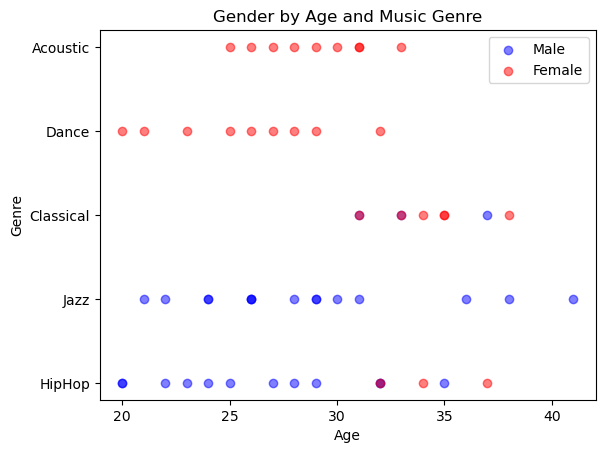

In [62]:
import matplotlib.pyplot as plt

# Create separate arrays for male and female data points
male_data = data[data["gender"] == 1]
female_data = data[data["gender"] == 0]

# Create a scatter plot of male and female data points
plt.scatter(male_data["age"], male_data["genre"], c="blue", alpha=0.5, label="Male")
plt.scatter(female_data["age"], female_data["genre"], c="red", alpha=0.5, label="Female")

# Add axis labels and a title
plt.xlabel("Age")
plt.ylabel("Genre")
plt.title("Gender by Age and Music Genre")

# Add a legend
plt.legend()

# Display the plot
plt.show()



In [63]:
def sigmoid(z):
    g = 1 / (1 + np.exp(-np.clip(z, -500, 500)))
    return g

In [64]:
def compute_cost(X,y,w,b,*argv):
    m,n = X.shape
    loss = 0
    for i in range(m):
        z_wb = np.dot(X[i],w) + b
        f_wb_i = sigmoid(z_wb)
        epsilon = 1e-8
        f_wb_i = np.clip(f_wb_i, epsilon, 1 - epsilon) # Clip probability values to be within [epsilon, 1-e
        loss += -y[i] * np.log(f_wb_i) - (1-y[i]) * np.log(1-f_wb_i)
    total_cost = (1/m) * loss
    return total_cost
        

In [65]:
def compute_gradient(X,y,w,b):
    dj_dw = np.zeros(w.shape)
    dj_db = 0
    m,n = X.shape
    for i in range(m):
        z_wb = np.dot(X[i],w) + b
        f_wb_i = sigmoid(z_wb)
        err_i = (f_wb_i - y[i])
        dj_db += err_i 
        for j in range(n):
            dj_dw[j] += err_i * X[i,j]
    dj_dw = (1/m) * dj_dw
    dj_db = (1/m) * dj_db
    
    return dj_db,dj_dw

In [66]:
# Compute and display cost and gradient with non-zero w and b
test_w = np.random.rand(6,)
test_b = -24
dj_db, dj_dw  = compute_gradient(X_train, y_train, test_w, test_b)

print('dj_db at test w and b:', dj_db)
print('dj_dw at test w and b:', dj_dw.tolist())


dj_db at test w and b: -0.26445684323789465
dj_dw at test w and b: [-5.756630024543172, 0.01840137914922824, 0.062365608060075364, 0.008011226099103534, -0.14850629598805423, -0.20472876055824762]


In [67]:
def gradient_descent(X,y,w_in,b_in,cost_function,gradient_function,alpha,num_iters):
    m = len(X)
    
    J_history = []
    w_history = []
    
    for i in range(num_iters):
        dj_db,dj_dw = gradient_function(X,y,w_in,b_in)
        
        w_in = w_in - alpha * dj_dw
        b_in = b_in - alpha * dj_db
        
        if i<100000:
            cost = cost_function(X,y,w_in,b_in)
            J_history.append(cost)
            
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
            
    return w_in,b_in,J_history,w_history
        

In [70]:
np.random.seed(1)
initial_w = 0.01 * (np.random.rand(6) - 0.5)
initial_b = -8

# Some gradient descent settings
iterations = 100000
alpha = 0.001

w,b, J_history,_w = gradient_descent(X_train ,y_train, initial_w, initial_b, 
                                   compute_cost, compute_gradient, alpha, iterations)
print(w,b)

Iteration    0: Cost     4.00   
Iteration 10000: Cost     0.67   
Iteration 20000: Cost     0.52   
Iteration 30000: Cost     0.45   
Iteration 40000: Cost     0.41   
Iteration 50000: Cost     0.38   
Iteration 60000: Cost     0.36   
Iteration 70000: Cost     0.35   
Iteration 80000: Cost     0.34   
Iteration 90000: Cost     0.33   
Iteration 99999: Cost     0.32   
[ 0.13307414 -2.02449343 -0.49776553 -1.62539685  2.74597559  4.3118631 ] -5.077435781692511


In [71]:
def predict(X, w, b): 
    """
    Predict whether the label is 0 or 1 using learned logistic
    regression parameters w
    
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      w : (ndarray Shape (n,))  values of parameters of the model      
      b : (scalar)              value of bias parameter of the model

    Returns:
      p : (ndarray (m,)) The predictions for X using a threshold at 0.5
    """
    # number of training examples
    m, n = X.shape   
    p = np.zeros(m)
   
    ### START CODE HERE ### 
    # Loop over each example
    for i in range(m):   
        z_wb = np.dot(X[i],w) + b
        f_wb_i = sigmoid(z_wb)
        if f_wb_i >= 0.5:
            p[i] = 1
        else:
            p[i] = 0
        
    ### END CODE HERE ### 
    return p

In [72]:
#Compute accuracy on our training set
w = np.array([0.13307414,-2.02449343,-0.49776553,-1.62539685,2.74597559,4.3118631])
b= -5.077435781692511
p = predict(X_train, w,b)
print(p)
print(y_train)
print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

[1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.
 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1.
 0. 0. 0. 1. 1. 1. 1. 1. 1.]
[1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0 0
 0 0 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0]
Train Accuracy: 89.473684
